In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data


In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.tail()

,date
212,8/21/20
213,8/22/20
214,8/23/20
215,8/24/20
216,8/25/20


In [6]:
#pd_raw['Country/Region']

In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]
print((pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:10]))

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    1
1/28/20    4
1/29/20    4
1/30/20    4
1/31/20    5
dtype: int64


In [8]:
pd_raw['Country/Region'].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [9]:
list_of_countries = list(pd_raw['Country/Region'].unique())

#print(list_of_countries[0:188])
top_100_countries = list_of_countries[0:188]
len(top_100_countries)
top_100_countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'US', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
top_100_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [10]:
country_list = top_100_countries
len(country_list)

188

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
df_plot[['date']]

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
5,1/27/20
6,1/28/20
7,1/29/20
8,1/30/20
9,1/31/20


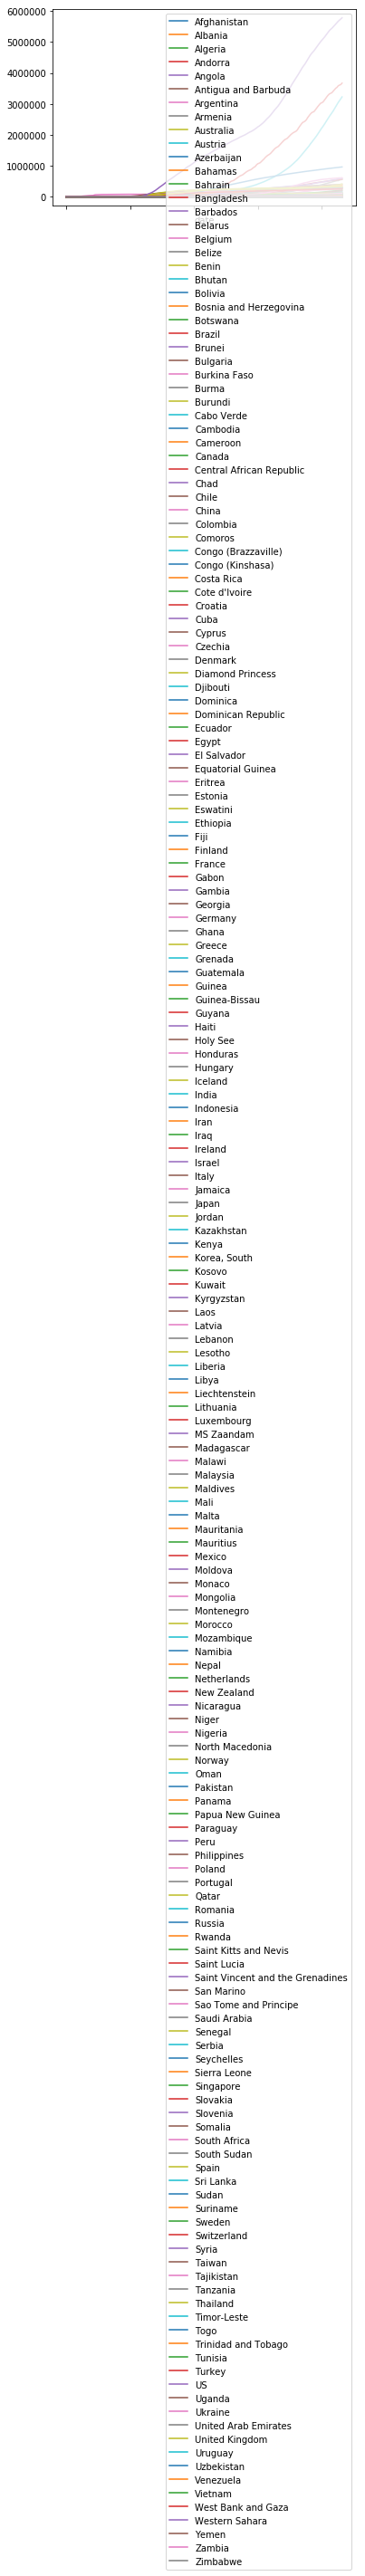

In [12]:
#%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [13]:
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

str

In [15]:
time_idx = [datetime.strptime(each,"%m/%d/%y")for each in df_plot['date']]

In [16]:
df_plot.date = time_idx
type(df_plot.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
lis = df_plot.columns.tolist()
lis

['date',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 

In [18]:
df_plot.to_csv('../data/processed/COVID_100_flat_table.csv',sep=';',index=False)

In [19]:
list = ['Afghanistan','US', 'India', 'Zimbabwe', 'Vietnam']

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [20]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [21]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,no,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,no,Albania,41.153300,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,no,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,no,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,no,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283
5,no,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
6,no,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638
7,no,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997


In [22]:
#pd_data_base.drop(233).reset_index()

In [31]:
#pd_data_base=pd_data_base.drop(['Lat','Long','state'],axis=1) #should run only once as lat long are already removed.
x = pd_data_base.set_index('country').groupby('country').sum()
res = x.T.stack(level=[0])
#res.head()
x

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
Albania,0,0,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
Algeria,0,0,0,0,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
Andorra,0,0,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
Angola,0,0,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
Argentina,0,0,0,0,0,0,0,0,0,0,...,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638
Armenia,0,0,0,0,0,0,0,0,0,0,...,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936
Australia,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113


In [24]:
processed = pd.DataFrame(x.T.stack(level=[0]) ).rename(columns={
                                                   0:'confirmed'})

processed.reset_index().columns#
ress = processed.reset_index().rename(columns={'level_0':'date'})

#ress[ress['country'] == 'Canada']
ress.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)
ress

,date,country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
5,1/22/20,Antigua and Barbuda,0
6,1/22/20,Argentina,0
7,1/22/20,Armenia,0
8,1/22/20,Australia,0
9,1/22/20,Austria,0


In [49]:
pd_relational_model=pd_data_base.set_index(['country'])       \
                                .T                              \
                                .stack(level=[0])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
#.#set_index(['state','country']) \
print(pd_relational_model.tail())
dff = pd_relational_model#.set_index(['date','country'])
#dff['date']=[datetime.strptime( each,"%m/%d/%y") for each in dff.date]
#type(dff['date'][0])
print(dff.columns)
dff.tail()
dfff = dff.reset_index().groupby(['date','country']).sum()


#dff.tail(5000).to_csv('../data/processed/aalloo.csv',sep=',',index=False)

dff.reset_index().to_csv('../data/processed/aalloo.csv',sep=';',index=False)
#sem = dff.rename_axis(['date','country'])
#sem[['8/24/20']]
#sem.groupby(['date','country']).last()

#sem.describe()
#g = dffff.reset_index()
#g.tail(188)

#dff
#droppped = pd_relational_model.drop('state',axis = 1)
#droppped.tail(188)
dfff.tail()
dff.confirmed.tail(10000)
n = dfff.reset_index()
#type(n['date'][0])
#dff.date
#n.date
n.tail()
dfff

          date             country confirmed
58515  8/25/20  West Bank and Gaza     19678
58516  8/25/20      Western Sahara        10
58517  8/25/20               Yemen      1924
58518  8/25/20              Zambia     11285
58519  8/25/20            Zimbabwe      6196
Index(['date', 'country', 'confirmed'], dtype='object')


index
date    country                  
1/22/20 Afghanistan           798
        Albania               799
        Algeria               800
        Andorra               801
        Angola                802
...                           ...
state   West Bank and Gaza    261
        Western Sahara        262
        Yemen                 263
        Zambia                264
        Zimbabwe              265

[41360 rows x 1 columns]

In [50]:
dff['date']=[datetime.strptime( each,"%m/%d/%y") for each in dff.date]
type(dff['date'][0])

ValueError: time data 'state' does not match format '%m/%d/%y'

In [51]:
dff.dtypes

date         object
country      object
confirmed    object
dtype: object

In [52]:
dff['date']=dff.date.astype('datetime64[ns]')

ParserError: Unknown string format: state

In [53]:
dff.dtypes

date         object
country      object
confirmed    object
dtype: object

In [54]:
dff.confirmed=dff.confirmed.astype(int)

dff.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

ValueError: invalid literal for int() with base 10: 'no'

In [55]:
print(dff[dff['country']=='US'].tail())

          date country confirmed
57432  8/21/20      US   5622540
57698  8/22/20      US   5667112
57964  8/23/20      US   5701679
58230  8/24/20      US   5739724
58496  8/25/20      US   5777710


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [56]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,604,605,606,613,619,622,626,629,633,628
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,469,474,476,490,494,501,503,510,510,511
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,860,863,887,901,912,930,931,934,946,967


In [57]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [58]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [59]:
# update the large relational file

In [60]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [61]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [62]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [63]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

                       date country confirmed    state
58300   2020-01-22 00:00:00      US         0  Alabama
58301   2020-01-22 00:00:00      US         0  Alabama
58302   2020-01-22 00:00:00      US         0  Alabama
58303   2020-01-22 00:00:00      US         0  Alabama
58304   2020-01-22 00:00:00      US         0  Alabama
...                     ...     ...       ...      ...
783075  2020-08-25 00:00:00      US       412  Wyoming
783076  2020-08-25 00:00:00      US       283  Wyoming
783077  2020-08-25 00:00:00      US         0  Wyoming
783078  2020-08-25 00:00:00      US       108  Wyoming
783079  2020-08-25 00:00:00      US        11  Wyoming

[724780 rows x 4 columns]


### cross check on full sum US data

In [ ]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']
check_US

In [ ]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()